### Udacity Data Analyst Nanodegree: Data Wrangling Project

## The tasks of the project include the following:

- Data wrangling, which consists of
    - Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

### import packages 

In [1]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Gathering Data 

In [2]:
# get WeRateDogs Twitter archive 
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# get weet image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)

In [4]:
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [5]:
with open('tweet-json.txt') as file:
    for i in file:
        print(i)
        break

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

In [6]:
# read in 'tweet-json.txt', tweet ID, retweet count, and favorite count, line by line into pandas DF 

df_retweet = pd.DataFrame()

with open('tweet-json.txt') as file:
    for i in file:
        data = json.loads(i)
        tweet_id = data['id']# get the tweet_id
        retweet_count = data['retweet_count']# get the retweet_count
        favorite_count = data['favorite_count']# get the favorite_count
        df = pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                          columns=['tweet_id', 'retweet_count', 'favorite_count'])
        df_retweet = df_retweet.append(df)
        
df_retweet.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
0,892177421306343426,6514,33819


### Assessing the data 

#### Assessing twitter archive 

In [7]:
df_twitter.shape

(2356, 17)

In [8]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_twitter.duplicated().sum()

0

In [12]:
df_twitter.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

#### Assessing Image prediction file

In [13]:
df_image.shape

(2075, 12)

In [14]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [17]:
df_image.duplicated().sum()

0

In [18]:
df_image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64


#### Assessing retweets data 

In [19]:
df_retweet.shape

(2354, 3)

In [20]:
df_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


In [21]:
df_retweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [22]:
df_retweet.drop_duplicates(inplace =True)

In [23]:
df_retweet.duplicated().sum()

0

In [24]:
df_retweet.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [25]:
df_retweet.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

**df_twitter, df_image, df_retweet**

#### Quality Issues
1. df_twitter has has invalid entries in **name** column
2. df_twitter hsas 181 columns of retweeted data that need to be dropped
3. Correct df_twitter.timestamp datatype to **DateTime**
4. We only need tweets with image and should drop the one without image
5. Drop unrelated columns
6. Tweet_id should be string data type
7. Drop any rows whose rate_denominator is not 10
8. So many dogs missing name and cannot be corrected due to limited information

#### Tidiness Issues 

1. Merge dog stages columns into one single columns
2. Merge 3 tables into one single table


### Cleaning the data 

#### make a copy of original data

In [26]:
df_twitter_clean = df_twitter.copy()
df_image_clean = df_image.copy()
df_retweet_clean = df_retweet.copy()

#### 1. Clean invalid entry in **name** column in df_twitter_clean dataset 

In [27]:
df_twitter_clean.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Daisy          7
an             7
Buddy          7
Toby           7
Oscar          6
Dave           6
Jack           6
Bella          6
Rusty          6
Jax            6
Scout          6
Leo            6
Stanley        6
Koda           6
Milo           6
Sammy          5
            ... 
Evy            1
Kenzie         1
Buckley        1
Mary           1
Orion          1
Ricky          1
Fiji           1
Bodie          1
Jersey         1
Cuddles        1
Arya           1
BeBe           1
Jim            1
Sandra         1
Randall        1
Harlso         1
Laika          1
Mya            1
Sweet          1
DonDon         1
Maks           1
Jazzy          1
Spencer        1
Leonard        1
Lance          1
Nigel          1
Barney         1
Jameson       

In [28]:
# print out all the invalid names in df_twitter_clean dataset
df_twitter_clean[df_twitter_clean.name.apply(lambda x : x.islower())]['name'].value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
not              2
actually         2
mad              2
getting          2
this             1
life             1
his              1
such             1
incredibly       1
unacceptable     1
space            1
old              1
my               1
by               1
infuriating      1
officially       1
all              1
light            1
Name: name, dtype: int64

In [29]:
def eliminate_name(name):
    if name[0].isupper() or name ==None:
        return name
    else:
        return

In [30]:
df_twitter_clean.name = df_twitter_clean.name.apply(eliminate_name)

In [31]:
df_twitter_clean.name = df_twitter_clean.name.fillna('None')

In [32]:
df_twitter_clean.name.value_counts()

None         854
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
Buddy          7
Toby           7
Bailey         7
Daisy          7
Bella          6
Stanley        6
Jack           6
Oscar          6
Dave           6
Jax            6
Scout          6
Rusty          6
Leo            6
Milo           6
Koda           6
Sammy          5
Gus            5
George         5
Oakley         5
            ... 
Scruffers      1
Henry          1
Emmie          1
Tito           1
Ebby           1
Jameson        1
Nigel          1
Willy          1
Sandra         1
Rilo           1
Zooey          1
Philippe       1
Donny          1
Cuddles        1
Arya           1
Mauve          1
BeBe           1
Fletcher       1
Randall        1
Lance          1
Harlso         1
Laika          1
Mya            1
Jersey         1
Sweet          1
Maks           1
Jazzy          1
Spencer       

In [33]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2. Drop 181 retweet data in df_twitter_clean  

In [34]:
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_id.isnull()]
df_twitter_clean.info()
# as we can see, there is no more retweet data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### 3. Correct the data type of timestamp to DateTime data type 

In [35]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean.timestamp)
df_twitter_clean.timestamp.dtype

datetime64[ns, UTC]

#### 4. Drop the data without image

In [36]:
df_twitter_clean = df_twitter_clean[df_twitter_clean.expanded_urls.notnull()]
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns, UTC]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns, UT

#### 5. Drop unrelated columns include:  
- in_reply_to_status_id,
- in_reply_to_user_id,
- retweeted_status_id,
- retweeted_status_user_id,
- retweeted_status_timestamp

In [37]:
df_twitter_clean = df_twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1)

In [38]:
## double check that unrelated columns are dropped
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns, UTC]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 215.0+ KB


#### 6. Tweet_id should be string data type 

In [39]:
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype(str)

In [40]:
df_twitter_clean['tweet_id'].dtype

dtype('O')

#### 7. Drop any rows whose denominator is not 10 

In [41]:

df_twitter_clean[df_twitter_clean.rating_denominator !=10].index

Int64Index([ 433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1634, 1635, 1662, 1779, 1843, 2335],
           dtype='int64')

In [42]:
df_twitter_clean = df_twitter_clean.drop(df_twitter_clean[df_twitter_clean.rating_denominator !=10].index)

In [43]:
df_twitter_clean[df_twitter_clean.rating_denominator !=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2099 non-null object
timestamp             2099 non-null datetime64[ns, UTC]
source                2099 non-null object
text                  2099 non-null object
expanded_urls         2099 non-null object
rating_numerator      2099 non-null int64
rating_denominator    2099 non-null int64
name                  2099 non-null object
doggo                 2099 non-null object
floofer               2099 non-null object
pupper                2099 non-null object
puppo                 2099 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 213.2+ KB


#### 8. So many dogs missing name and cannot be corrected due to limited information

In [45]:
df_twitter_clean[df_twitter_clean['name']=='None']['name'].count()

711

### Tidiness Issues 

#### 1. Merge dog stage columns into one column 

In [46]:
df_twitter_clean['stage'] = df_twitter_clean.text.str.findall('(doggo|floofer|pupper|puppo)')
df_twitter_clean['stage'] = df_twitter_clean['stage'].apply(lambda x: ''.join(set(x)))

In [47]:
df_twitter_clean['stage'] = df_twitter_clean['stage'].replace('',np.nan)

In [48]:
df_twitter_clean['stage'].value_counts()


pupper         234
doggo           74
puppo           27
pupperdoggo      8
floofer          4
doggopuppo       2
Name: stage, dtype: int64

In [49]:
df_twitter_clean.drop(df_twitter_clean[['doggo','puppo','pupper','floofer']],axis=1,inplace=True)

In [50]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2099 non-null object
timestamp             2099 non-null datetime64[ns, UTC]
source                2099 non-null object
text                  2099 non-null object
expanded_urls         2099 non-null object
rating_numerator      2099 non-null int64
rating_denominator    2099 non-null int64
name                  2099 non-null object
stage                 349 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 164.0+ KB


#### 2. Merge 3 tables into one table 

In [51]:

df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)
df_retweet_clean['tweet_id'] = df_retweet_clean['tweet_id'].astype(str)

In [52]:
df_clean = df_twitter_clean.merge(df_image_clean,how='inner',on='tweet_id').merge(df_retweet_clean,how='inner',on='tweet_id')

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 22 columns):
tweet_id              1976 non-null object
timestamp             1976 non-null datetime64[ns, UTC]
source                1976 non-null object
text                  1976 non-null object
expanded_urls         1976 non-null object
rating_numerator      1976 non-null int64
rating_denominator    1976 non-null int64
name                  1976 non-null object
stage                 319 non-null object
jpg_url               1976 non-null object
img_num               1976 non-null int64
p1                    1976 non-null object
p1_conf               1976 non-null float64
p1_dog                1976 non-null bool
p2                    1976 non-null object
p2_conf               1976 non-null float64
p2_dog                1976 non-null bool
p3                    1976 non-null object
p3_conf               1976 non-null float64
p3_dog                1976 non-null bool
retweet_count         1976 

### Storing the clean dataset 

In [54]:
df_clean.to_csv('twitter_archive_master.csv', index = False)

In [55]:
analyze = df_clean.copy()

### Analyzing and Visualizing the dataset 

#### Three Insights

In [56]:
#1 what is the most retweet picture?
most_retweet = analyze[['jpg_url','retweet_count']]


In [57]:
from IPython.display import Image
from IPython.core.display import HTML 

In [58]:
Image(url= most_retweet.loc[0].jpg_url)

In [59]:
#2 what is the most favorite picture?
most_fav = analyze[['jpg_url','favorite_count']]

In [60]:
most_fav.loc[0]

jpg_url           https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
favorite_count                                              39467
Name: 0, dtype: object

In [61]:
Image(url= most_fav.loc[0].jpg_url)

In [62]:
# 3 what is the picture with the lowest score in the dataset?
analyze['score'] = analyze['rating_numerator'] / analyze['rating_denominator']

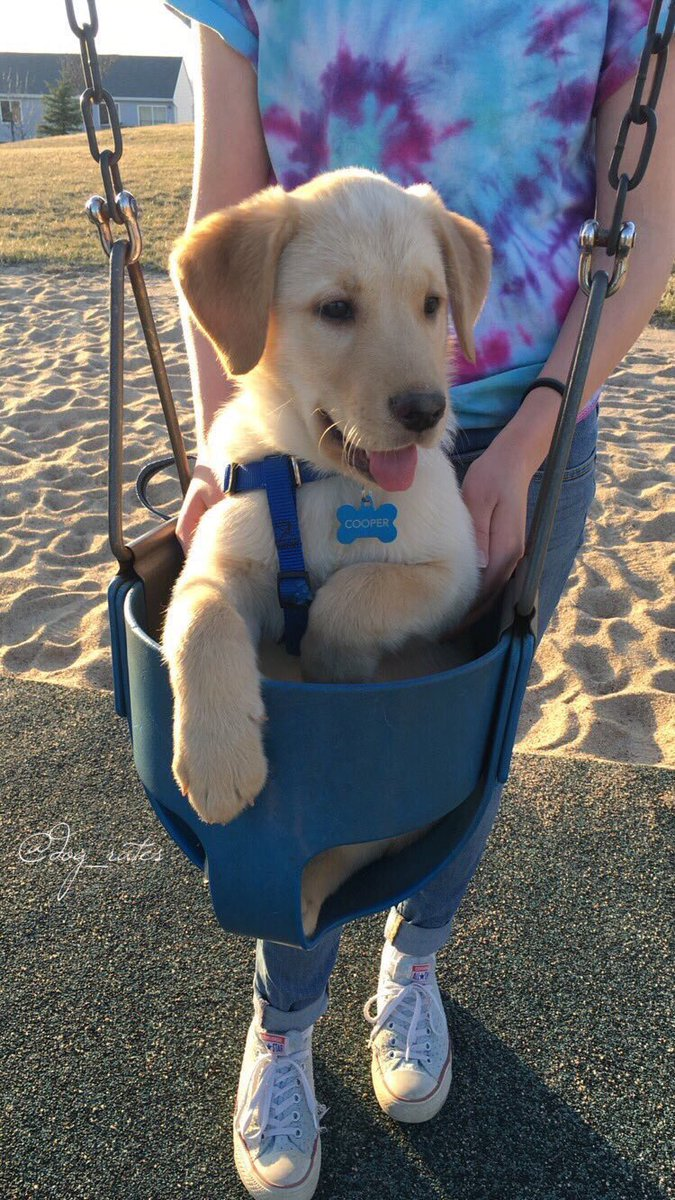

In [63]:
lowest_rate = analyze[analyze['score']==analyze['score'].min()].jpg_url
lowest_rate = np.array(lowest_rate)
Image(lowest_rate[0])


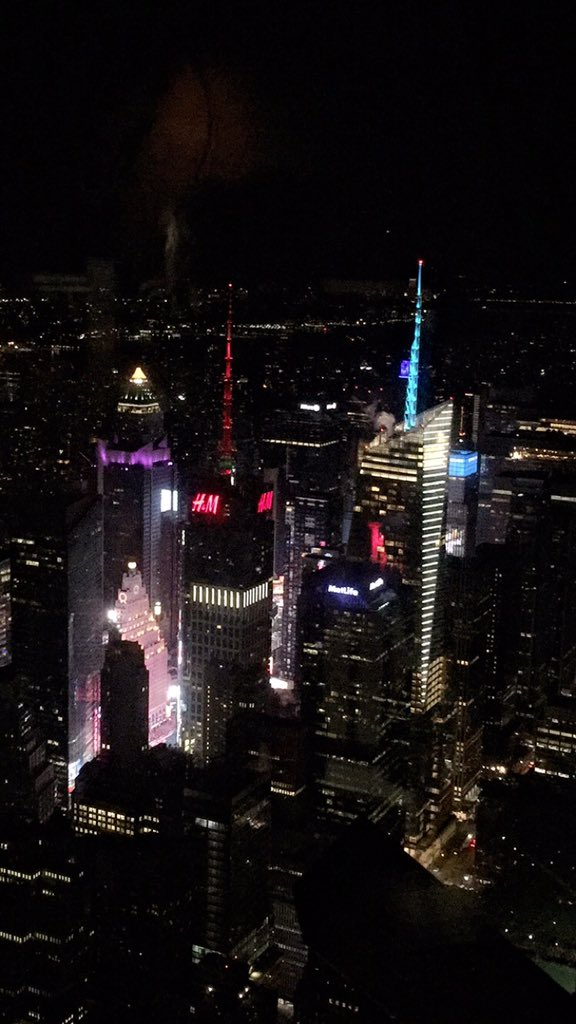

In [64]:
Image(lowest_rate[1])
    
     

### Visualization 

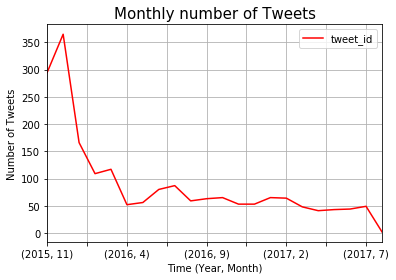

In [65]:
month_tweet = analyze['tweet_id'].groupby([analyze['timestamp'].dt.year, analyze['timestamp'].dt.month]).count()
month_tweet.plot('line',color='red',grid= True,legend = True)
plt.title('Monthly number of Tweets', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_over_time')

Text(0, 0.5, 'Retweet Count')

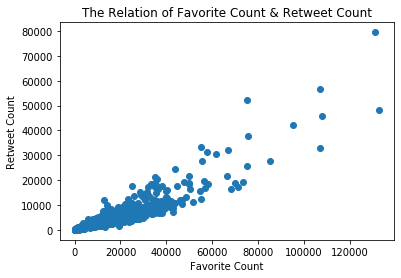

In [66]:
plt.scatter(analyze['favorite_count'],analyze['retweet_count'])
plt.title('The Relation of Favorite Count & Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')